In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [204]:
df=pd.read_csv("heart - heart.csv")

In [205]:
df.shape

(918, 12)

In [206]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [207]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [209]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [210]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [211]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [212]:
#Encoding
!pip install category_encoders

In [213]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=categorical_cols)
df=encoder.fit_transform(df)

In [214]:
df.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

In [215]:
# Split the data into features (X) and target (y)
df.columns = df.columns.str.strip() 
x = df.drop('HeartDisease', axis=1) 
y = df['HeartDisease']

In [216]:
df["HeartDisease"].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

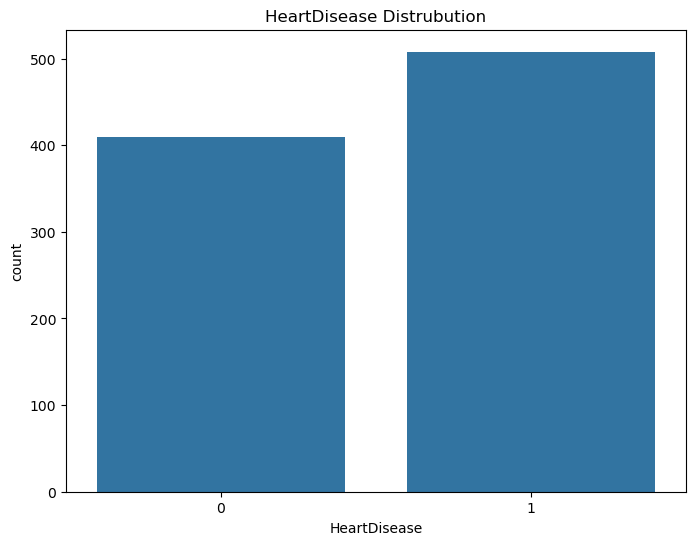

In [217]:
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease', data=df)
plt.title('HeartDisease Distrubution')
plt.show()

In [218]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,1,0.0,1
1,49,2,2,160,180,0,1,156,1,1.0,2
2,37,1,1,130,283,0,2,98,1,0.0,1
3,48,2,3,138,214,0,1,108,2,1.5,2
4,54,1,2,150,195,0,1,122,1,0.0,1


In [219]:
# scaling the input feature data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,-0.515952,-1.705573,0.410909,0.825070,-0.551341,-0.749180,1.382928,-0.823556,-0.832432,-1.052114
1,-0.478484,1.938163,-0.530992,1.491752,-0.171961,-0.551341,-0.749180,0.754157,-0.823556,0.105664,0.596078
2,-1.751359,-0.515952,-1.705573,-0.129513,0.770188,-0.551341,0.492241,-1.525138,-0.823556,-0.832432,-1.052114
3,-0.584556,1.938163,0.643588,0.302825,0.139040,-0.551341,-0.749180,-1.132156,1.214246,0.574711,0.596078
4,0.051881,-0.515952,-0.530992,0.951331,-0.034755,-0.551341,-0.749180,-0.581981,-0.823556,-0.832432,-1.052114


In [220]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [221]:
# divide into train dataset and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [222]:
x_train.shape,y_train.shape

((734, 11), (734,))

In [223]:
x_test.shape,y_test.shape

((184, 11), (184,))

In [224]:
# apply ml algorithm into training data
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [225]:
rf_pred = rf_model.predict(x_test)
rf_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1])

In [226]:
rf_pred[:5]

array([0, 1, 1, 1, 0])

In [227]:
y_test[:5]

668    0
30     1
377    1
535    1
807    0
Name: HeartDisease, dtype: int64

In [228]:
#model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf_accuracy = accuracy_score(y_test,rf_model.predict(x_test)) *100

print(f"RF Accuracy: {rf_accuracy:.2f}%")

RF Accuracy: 88.59%


In [229]:
print("\nClassification Report:\n", classification_report(y_test, rf_pred))
conf_matrix = confusion_matrix(y_test,rf_pred)
conf_matrix


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86        77
           1       0.90      0.91      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



array([[66, 11],
       [10, 97]])

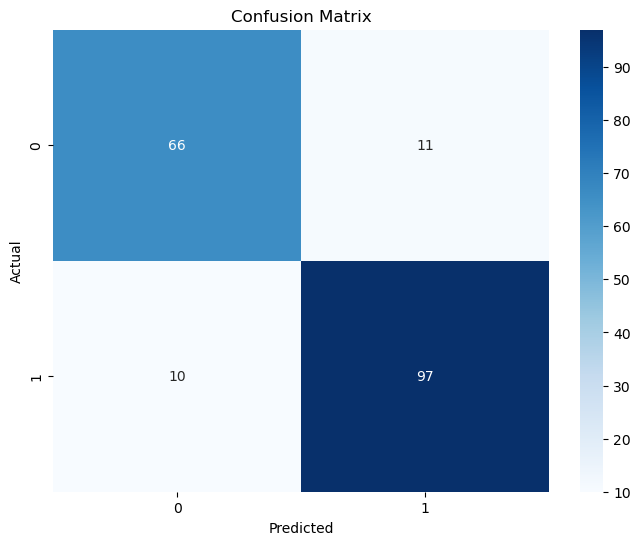

In [230]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [231]:
#Feature Importance
importances = pd.Series(rf_model.feature_importances_, index=x.columns)
top_features = importances.sort_values(ascending=False).head(10)
print("\nTop 10 Important Features:\n", top_features)


Top 10 Important Features:
 ST_Slope          0.230705
Oldpeak           0.120372
Cholesterol       0.114611
ExerciseAngina    0.106632
MaxHR             0.103294
ChestPainType     0.091888
Age               0.088793
RestingBP         0.066184
Sex               0.033445
RestingECG        0.024305
dtype: float64


In [232]:
x_top = x[top_features.index]

In [233]:
#Train New Model with Reduced Features
x_train_top, x_test_top, y_train_top, y_test_top = train_test_split(x_top, y, test_size=0.2, random_state=42)
rf_top = RandomForestClassifier(random_state=42)
rf_top.fit(x_train_top, y_train_top)

RandomForestClassifier(random_state=42)

In [234]:
# Evaluate Reduced Model
y_pred_top = rf_top.predict(x_test_top)
rf_top_accuracy = accuracy_score(y_test_top, y_pred_top) * 100

print(f"\nReduced Model Accuracy (Top 5 Features): {rf_top_accuracy:.2f}%")
print("\nClassification Report (Reduced Model):\n", classification_report(y_test_top, y_pred_top))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_top, y_pred_top))


Reduced Model Accuracy (Top 5 Features): 84.24%

Classification Report (Reduced Model):
               precision    recall  f1-score   support

           0       0.79      0.84      0.82        77
           1       0.88      0.84      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184


Confusion Matrix:
 [[65 12]
 [17 90]]


In [235]:
#applying Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
ada_model.fit(x_train, y_train)

AdaBoostClassifier()

In [236]:
#model evaluation
from sklearn.metrics import accuracy_score
ada_accuracy = accuracy_score(y_test,ada_model.predict(x_test)) *100

print(f"ADA boost Accuracy: {ada_accuracy:.2f}%")

ADA boost Accuracy: 85.87%


In [237]:
#apply voting classifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

# Create individual models
model1 = LogisticRegression(max_iter=1000)
model2 = KNeighborsClassifier(n_neighbors=5)
model3 = DecisionTreeClassifier(random_state=42)

# Combine models into a voting classifier
voting_model = VotingClassifier(
    estimators=[
        ('lr', model1),
        ('knn', model2),
        ('dt', model3)
    ],
    voting='soft'
)
voting_model.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('knn', KNeighborsClassifier()),
                             ('dt', DecisionTreeClassifier(random_state=42))],
                 voting='soft')

In [238]:
#model evaluation
from sklearn.metrics import accuracy_score
voting_accuracy = accuracy_score(y_test,voting_model.predict(x_test)) *100

print(f"Voting Accuracy: {voting_accuracy:.2f}%")

Voting Accuracy: 86.41%


In [239]:
#applying stacking classifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier

# Base models (level-0)
base_models = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('dt', DecisionTreeClassifier(random_state=42))
]

# Meta model (level-1)
meta_model = LogisticRegression(max_iter=1000)

# Create stacking classifier
stack_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train stacking model
stack_model.fit(x_train, y_train)


StackingClassifier(estimators=[('knn', KNeighborsClassifier()),
                               ('dt', DecisionTreeClassifier(random_state=42))],
                   final_estimator=LogisticRegression(max_iter=1000))

In [240]:
#model evaluation
from sklearn.metrics import accuracy_score
stacking_accuracy = accuracy_score(y_test,stack_model.predict(x_test)) *100

print(f"Stacking Accuracy: {stacking_accuracy:.2f}%")

Stacking Accuracy: 82.61%


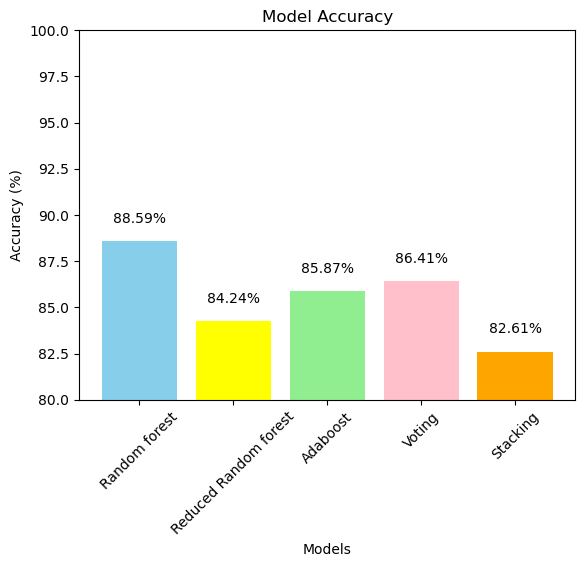

In [243]:
#bar chart for showing accuracies 
models = ['Random forest','Reduced Random forest','Adaboost','Voting','Stacking']
accuracies = [rf_accuracy,rf_top_accuracy,ada_accuracy,voting_accuracy,stacking_accuracy]
plt.bar(models, accuracies, color=['skyblue','yellow','lightgreen','pink','orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy')
plt.xticks(rotation=45)
plt.ylim(80,100)
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center')
plt.show()